<a href="https://colab.research.google.com/github/NippunSharma/Locally-Weighted-Regression/blob/master/Quasar_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
data = pd.read_csv('/content/quasar_train.txt')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Columns: 450 entries, 1150.000 to 1599.000
dtypes: float64(450)
memory usage: 703.2 KB


In [0]:
wavelengths = data.columns.astype('float')
wavelengths = np.array(wavelengths)

In [0]:
tau = 5
X = wavelengths.copy()
X = np.array(X).reshape((data.shape[1], 1))
dummy = np.ones(X.shape)
X = np.concatenate((dummy, X), axis=1)
data_smoothed = []

for k in range(data.shape[0]):
  smoothed = []

  Y = data.loc[k,:]
  Y = np.array(Y).reshape((data.shape[1], 1))

  W = np.zeros((data.shape[1], data.shape[1]))

  for x in X:
    x = np.array(x)
    for i in range(data.shape[1]):
      W[i][i] = np.math.exp(-np.sum((x - X[i])**2)/(2*(tau)**2))
    theta_weighted = np.linalg.inv(X.T.dot(W.dot(X))).dot(X.T.dot(W.dot(Y)))
    smoothed.append(theta_weighted.T.dot(x))
  
  data_smoothed.append(smoothed)


In [0]:
data_smoothed = np.array(data_smoothed)
for i in range(data_smoothed.shape[0]):
  i = np.array(i)

In [0]:
def difference(f1, f2):
  return np.sum((f1 - f2)**2)

def k_nearest(f, fi, k):
  scores = []
  for j in range(len(f)):
    scores.append(difference(fi, f[j]))
  
  res = sorted(range(len(f)), key = lambda sub: scores[sub])
  return res[1:k+1], scores[res[-1]]

def ker(x):
  band = 1
  return np.exp(-x/2*(band)**2)

def functionalRegression(lyman, wavelengths, data, fright, k):
  dataRight = []
  dataLeft = []
  for i in range(len(data)):
    dataRight.append(np.array(data[i][wavelengths > lyman+100]))
    dataLeft.append(np.array(data[i][wavelengths < lyman]))
  dataRight = np.array(dataRight)
  dataLeft = np.array(dataLeft)

  kNeighbours, d = k_nearest(dataRight, fright, k)

  num = 0
  den = 0
  for i in kNeighbours:
    num += ker(difference(dataRight[i], fright)/d)*(dataLeft[i])
    den += ker(difference(dataRight[i], fright)/d)
  f_hat = num/den

  return f_hat

In [0]:
errors = []
for i in range(data.shape[0]):
  f_hat = functionalRegression(1200, wavelengths, data_smoothed, data_smoothed[i][wavelengths > 1300], 5)
  errors.append(difference(f_hat, data_smoothed[i][wavelengths < 1200]))

In [109]:
print(np.mean(errors))

2.2471434674107083


In [0]:
test = pd.read_csv('/content/quasar_test.csv.txt')

In [123]:

tau = 5
X = wavelengths.copy()
X = np.array(X).reshape((test.shape[1], 1))
dummy = np.ones(X.shape)
X = np.concatenate((dummy, X), axis=1)
test_smoothed = []

for k in range(test.shape[0]):
  smoothed = []
  print('sample: ' + str(k))
  Y = test.loc[k,:]
  Y = np.array(Y).reshape((test.shape[1], 1))

  W = np.zeros((test.shape[1], test.shape[1]))

  for x in X:
    x = np.array(x)
    for i in range(test.shape[1]):
      W[i][i] = np.math.exp(-np.sum((x - X[i])**2)/(2*(tau)**2))
    theta_weighted = np.linalg.inv(X.T.dot(W.dot(X))).dot(X.T.dot(W.dot(Y)))
    smoothed.append(theta_weighted.T.dot(x))
  
  test_smoothed.append(smoothed)


sample: 0
sample: 1
sample: 2
sample: 3
sample: 4
sample: 5
sample: 6
sample: 7
sample: 8
sample: 9
sample: 10
sample: 11
sample: 12
sample: 13
sample: 14
sample: 15
sample: 16
sample: 17
sample: 18
sample: 19
sample: 20
sample: 21
sample: 22
sample: 23
sample: 24
sample: 25
sample: 26
sample: 27
sample: 28
sample: 29
sample: 30
sample: 31
sample: 32
sample: 33
sample: 34
sample: 35
sample: 36
sample: 37
sample: 38
sample: 39
sample: 40
sample: 41
sample: 42
sample: 43
sample: 44
sample: 45
sample: 46
sample: 47
sample: 48
sample: 49


In [0]:
test_smoothed = np.array(test_smoothed)
errors_test = []
for i in range(test.shape[0]):
  test_smoothed[i] = np.array(test_smoothed[i])
  f_hat = functionalRegression(1200, wavelengths, data_smoothed, test_smoothed[i][wavelengths > 1300], 10)
  errors_test.append(difference(f_hat, test_smoothed[i][wavelengths < 1200]))

In [209]:
print(np.mean(errors_test))

2.6126426171160695


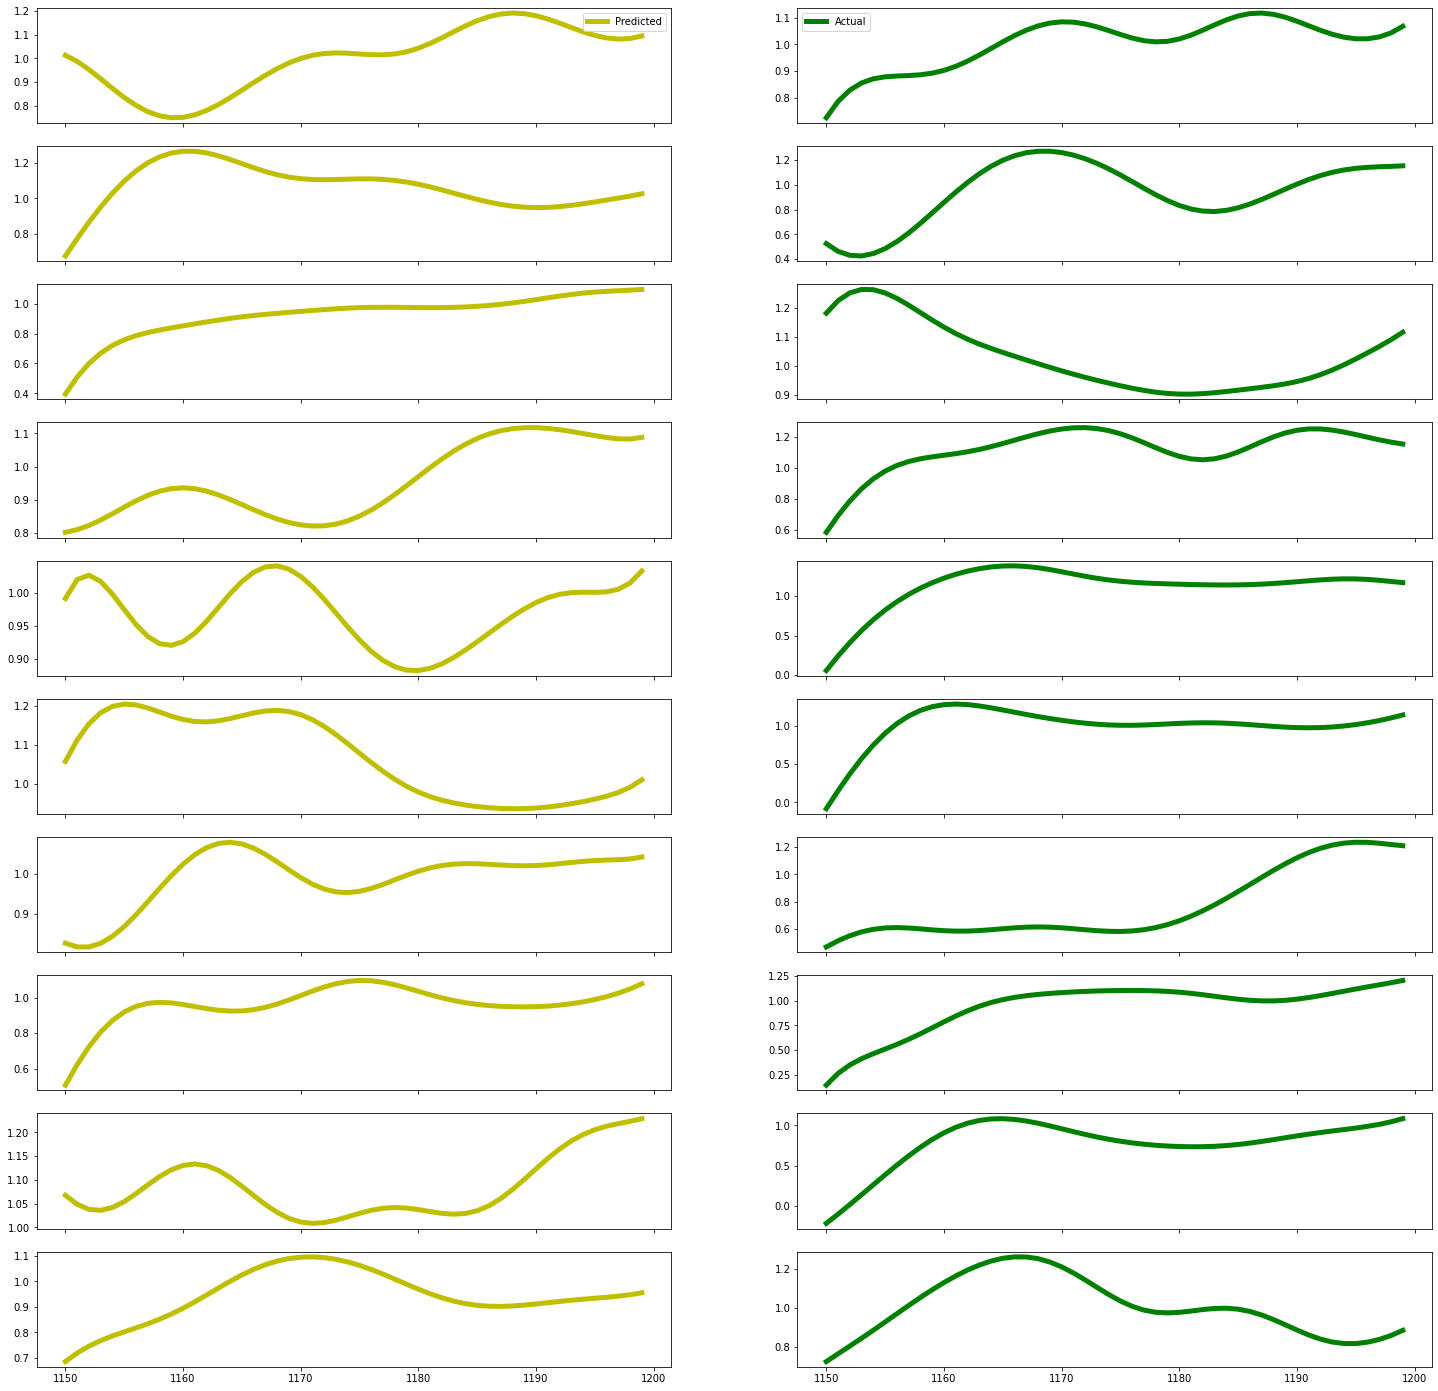

In [218]:
fig, axs = plt.subplots(nrows=10, ncols=2, sharex=True, figsize=(25,25))
for i in range(10):
    axs[i][0].plot(wavelengths[wavelengths < 1200], functionalRegression(1200, wavelengths, data_smoothed, test_smoothed[i][wavelengths > 1300], 3), color='y', linewidth=5,label='Predicted')
    axs[i][1].plot(wavelengths[wavelengths < 1200], test_smoothed[i][wavelengths < 1200], color='g', linewidth=5, label='Actual')
axs[0][0].legend()
axs[0][1].legend()